# Trabalho Final - Análise de Dados com Python

Integrantes:

    Carlos Eduardo Barbosa - 335518
    Daniel Gregoris Guarino - 335398
    Fabio de Campos Bordin - 336263
    Fernando Bareno Calo - 335434

### Qual será seu trabalho aqui?

Basicamente, vocês devem usar todo conhecimento que adquiriram durante o curso e criar um modelo de Regressão Linear cujo RMSE seja em torno de 69000, o que significa que o erro de predição é, em média, de 69000.
Entretanto, para chegar a essa predição, uma série de análise e preparações nos dados devem ser feitas. Vocês devem fazer os todo's que aqui foram deixados a fim de chegar a esse valor numa regressão

In [ ]:
# todos os pacotes que serão utilizados foram importados
# há alguns que não vimos em classe, mas parte do processo de avaliação entender como esses pacotes funcionam
# na prática, são muito similares aos que vimos em sala
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# carregar os dados a partir de arquivo csv (comma separated values) e leitura das 05 primeiras linhas do dataset
housing = pd.read_csv('bases/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# leitura das ultimas 05 linhas do dataset
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### TODO 1: Análise e visualização de dados

    1) Use o método info e o método describe para entender como os dados se comportam
    2) percebemos que existe uma coluna cujos valores são object. Quantos valores existem para cada atributo presente nessa coluna?
    3) plote um histograma de cada coluna numérica para entender a distribuição dos dados. Use 50 bins e ajuste o tamanho das imagens para (20,15)

O que você pode observar a partir dos histogramas? Os dados podem ser inseridos num algoritmo de machine learning da maneira que estão? Dica: não!! 

Tente descrever o motivo. 

In [ ]:
# resposta 1 

# método info para verificar quantidade de de variaveis, seus tipos e possíveis dados ausentes
# da leitura abaixo é possível identificar que o dataset possui uma variável categórica, e 09 variáveis numéricas
# este dataset possui 20640 registros e somente a variável total_bedrooms possui alguns dados ausentes (20433 dados não nulos)
# a descrição do significado de cada variável em português pode ser encontrada no arquivo 'housing.names'

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# quantos dados ausentes temos na variável total_bedrooms?

housing_null = housing[housing['total_bedrooms'].isnull()].shape[0]
print('Total de dados ausentes na variável "total_bedrooms": ', housing_null)

# isso é o mesmo que 20640 - 20433 conforme conferência feita abaixo através de expressão booleana
# o comando assert não retorna nada quando o resultado da comparação é igual a "True", o que siginifica que
# está correta a quantidade de dados ausentes que encontramos no dataset

assert housing_null == housing.shape[0] - 20433

Total de dados ausentes na variável "total_bedrooms":  207


In [ ]:
# método describe para verificar estatística descritiva das variáveis numéricas e também possíveis discrepâncias entre os 
# máximos e mínimos das variáveis do dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Conclusão:** É possível identificar que temos variáveis como `median_income` variam de 0.5 a 15, enquanto `total_rooms`varia de 2 até 39320 ou `population` que vai de 3 a 35682. Com isso temos a necessidade de **normalizar ou padronizar os valores das variáveis numéricas** no momento em que for realizada a limpeza dos dados (**TODO 5** neste relatório). Esse diferença de range (diferença do valor máximo para o valor mínimo) entre as variáveis poderá afetar a performance do modelo de regressão linear múltipla que desejamos criar para predição da variável alvo deste dataset. 

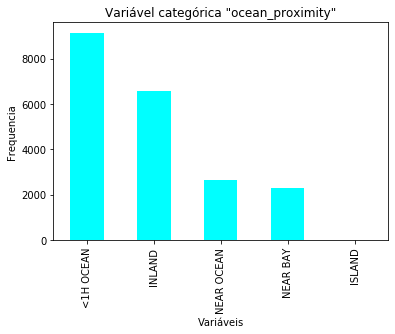

In [ ]:
# resposta 2 - Contagem dos valores de cada atributo da variável categórica "ocean_proximity" utilizando gráfico de barras
values_ocean = housing['ocean_proximity'].value_counts()
values_ocean.plot(kind='bar', colormap = 'cool')
plt.title('Variável categórica "ocean_proximity"')
plt.xlabel('Variáveis')
plt.ylabel('Frequencia')
plt.show();

In [ ]:
# temos 05 diferentes atributos para a variável categórica "ocean_proximity"
print('Atributos: ')
print(values_ocean)

Atributos: 
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


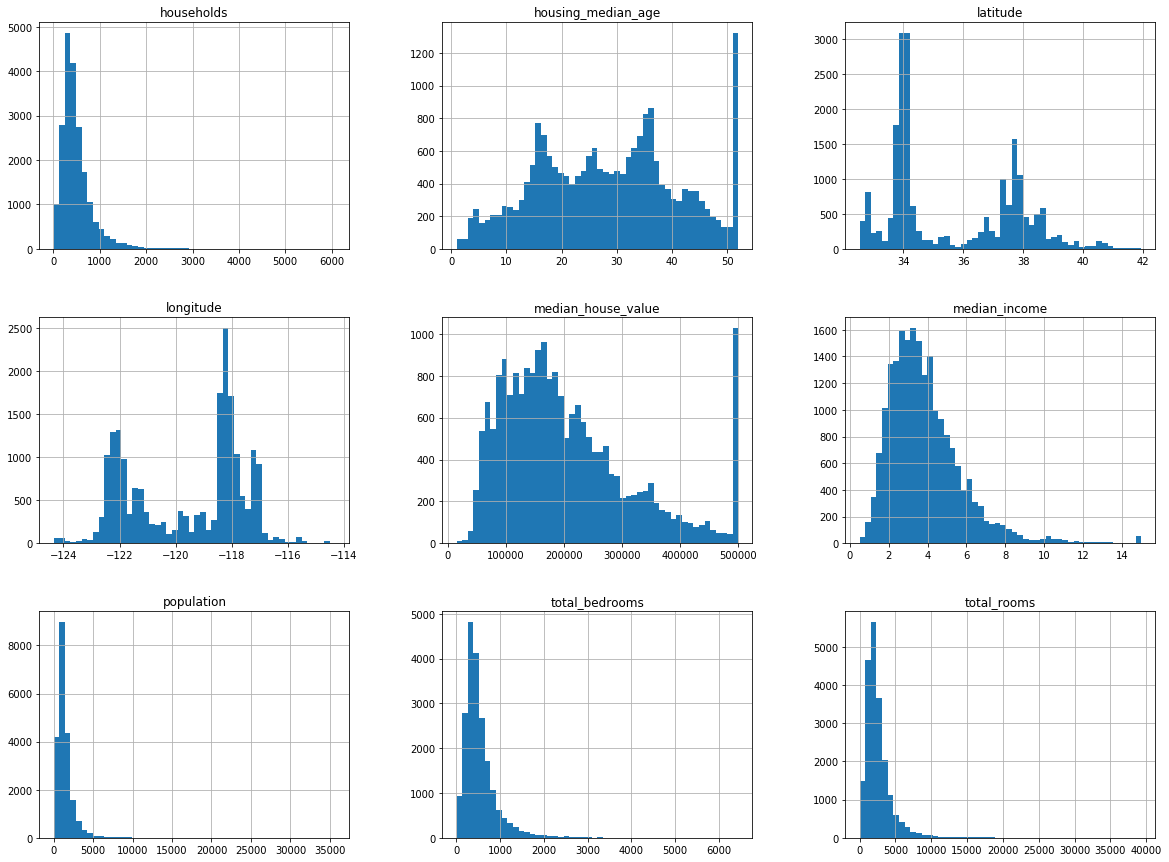

In [ ]:
# resposta 3 - Plot do histograma ds variáveis numéricas do dataset
housing.hist(bins=50, figsize=(20,15));

As variáveis `housing_median_age` ,  `latitude` e `longitude` possuem uma distribuição bimodal, enquanto as variáveis `households`, `median_income`, `population`,  `total_bedrooms` e `total_rooms` são assimétricas com maior concentração dos valores a esquerda da distribuição. A variável alvo `median_house_value` também assimétrica possui muitos outliers na cauda direita da distribuição, ou seja, o censo que originou estes dados mostra que no estado da California existem mais residências (maior frequência) com preço entre 450 e 500 dólares americanos do que de outros valores. Isso não significa que estes dados deverão ser removidos do dataset para a realização do modelo, muito pelo contrário, já que o modelo gerado deverá identificar em que condições uma casa deverá estar neste patamar de preço e quais condições deverá estar em outros patamares de preço. 

### TODO 2: Criando conjunto de treino e teste
    4) utilizando train_test_split, da Scikit-Learn, separe o conjunto em treino e teste. utilize train_set e test_set como nome de variáveis, separe 20% para conjunto de teste e utilize 42 como random_state

In [ ]:
# resposta 4
# aqui se opta por se manter a variável alvo e as variáveis independentes juntas, apenas separados entre treino e
# teste. A separação entre variável alvo e independente será feita na sessão de limpeza de dados (TODO 4)
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [ ]:
# leitura das 05 primeiras linhas do dataset de treino gerado pelo método train_test_split 
# da classe model_selection da biblioteca scikit learning
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


### TODO 3: Correlação e visualização

    5) Quais as variáveis que mais possuem correlação com o atributo median_house_value?
    6) Utilize scatter_matrix, do pandas para visualizar a correlação do atributo median_house_value com os atributos que possuem maior correlação com ele. Ajuste o tamanho das imagens para (12, 8)

In [ ]:
# resposta 5
# as variáveis median_income, total_rooms e housing_median_age são as mais correlacionadas positivamente com 
# a variável alvo
# latitude é a variável mais correlacionada negativamente
median_house_corr = housing.corr()['median_house_value'].sort_values(ascending = False)
median_house_corr

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

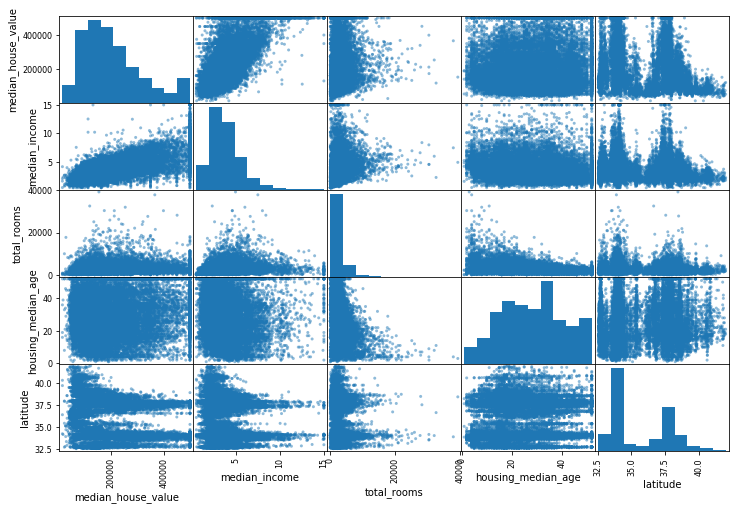

In [ ]:
# resposta 6 
# scatter plot comparando as variáveis independentes mais correlacionadas com a variável alvo (resposta) e histograma 
# das variáveis "median_house_values","median_income", "total_rooms", "housing_median_age"
# usando o método scatter_matrix 
from pandas.plotting import scatter_matrix

most_related = ['median_house_value','median_income','total_rooms','housing_median_age', 'latitude']
scatter_matrix(housing[most_related], figsize=(12,8))
plt.savefig('scatter_matrix_plot');

**Conclusão:** Os atributos com maior correlação à variável `median_house_value` são:
- `median_income`  = 0.688
- `total_rooms` = 0.134
- `housing_median_age` = 0.105

Só podemos verificar uma linearidade visuamente entre `median_house_value` e `median_income` o que confirma `median_income` como a variável mais fortemente correlacionada com a variável alvo. 

### TODO 4: Limpeza de dados

Ao usar o método info(), descobrimos que existem alguns dados faltantes no nosso algoritmo. **A partir daqui, a variável housing será o conteúdo de train_set, excluindo-se a coluna meta (median_house_value)**.  Atribua para a variável housing_labels uma cópia de train_set só com informações da coluna meta

    7) use SimpleImputer para tratar os valores faltantes. Escolha a estratégia que achar mais conveniente

In [ ]:
# Agora sim separar as variáveis independentes em uma nova variável separada da variável alvo
# a variável housing assume o nome do dataset de treino contendo apenas variáveis independentes. O dataset de teste não
# é examinado, pois não queremos saber de antemão quais respostas deveriamos ter, isso pode nos levar a enviesar o 
# modelo gerado.
housing= train_set.drop(['median_house_value'], axis =1)

# variável somente com informações da variável alvo                                
housing_labels = train_set['median_house_value'].copy()                               

In [ ]:
# resposta 7 - Agora é necessário também retirar a variável categórica 
# para tratar os dados ausentes das variáveis independentes usando o scikit learning

housing_num = housing.drop(columns = 'ocean_proximity')
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
imputer.fit(housing_num)
X = imputer.transform(housing_num)

# O output do método tranform da classe SimpleImputer é um numpy array, portanto precisamos 
# transformar este array novamente em dataframe.
housing_ = pd.DataFrame(X, columns=housing_num.columns)
housing_.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


### TODO 4: Manipulação de Atributos categóricos
    8) Utilizando OrdinalEncoder, manipule os valores categóricos para preparar os dados corretamente para algoritmos de machine learning

In [ ]:
# a variável categórica "ocean_proximity" excluida do dataset para o tratamento dos dados ausentes realizado anteriormente
# ganha seu tratamento. Agora separamos somente ela para transformar valores de texto em números ordinais
housing_string = housing[['ocean_proximity']]

housing_string.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND


In [ ]:
housing_string.tail()

,ocean_proximity
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN
15795,NEAR BAY


In [ ]:
# resposta 8
# Tranformação dos valores de texto para números ordinais usando a classe
# OrdinalEncoder da biblioteca scikit learning

ordinal_encoder = OrdinalEncoder()
housing_encoded = ordinal_encoder.fit_transform(housing_string)


# O output da classe OrdinalEncoder também é um numpy array, por isso novamente devemos transformar a resposta 
# em um dataframe. 
housing_encoded = pd.DataFrame(housing_encoded, columns=housing_string.columns)

housing_encoded.head()

,ocean_proximity
0,4.0
1,4.0
2,4.0
3,4.0
4,1.0


In [ ]:
housing_encoded.tail()

,ocean_proximity
16507,0.0
16508,1.0
16509,0.0
16510,0.0
16511,3.0


### TODO 5: Feature Normalization

Com algumas poucas exceções, algoritmos de machine learning não performam bem quando os atributos numéricos possuem escalas diferentes. Este é o caso de nosso dataset, em que o atributo total_rooms possui um range de 6 a 39320 enquanto median_income varia de 0.5 a 15.

Existem duas abordagens conhecidas para trazer os atributos para uma mesma escala: min-max scaling e standardization. 

min-max scaling (normalization) consiste em subtratir o valor minimo e dividir pela subtração de max por min:

\begin{align}
x = \frac{x - min}{max - min}
\end{align}

A Scikit-Learn provê o método MinMaxScaler que realiza essa operação. 

Já standardization consiste em subtrair a média(valores sempre terao média zero) e então dividir pela variância de modo que a distribuição resultante possua variância unitária. 

\begin{align}
x = \frac{x - \mu}{\sigma}
\end{align}

Diferentemente de normalization, standardization não leva os números a um intervalo específico, o que pode ser um problema para algoritmos específicos (por exemplo, redes neurais geralmente esperam um valor de entrada entre o intervalo 0-1). Entretanto, standdardization é muito menos sensível à outiliers. Scikit-learn provêo método StandardScaler para standardization. 

    9) Adeque os valores de cada coluna numérica para que eles fiquem normalizados. Use o método que achar mais conveniente

In [ ]:
# resposta 9 - padronizando os dados escolhando a classe StandardScaler 
scaler = StandardScaler()
scaler.fit(housing_)
housing_scaled = scaler.transform(housing_)
housing_scaled = pd.DataFrame(housing_scaled, columns=housing_num.columns)
housing_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488


### TODO 6: Pipeline de Transformação
    10) crie um pipeline de transformação para tratar os atributos numéricos, outro para tratar os atributos categóricos e um para juntar os dois e preparar todos os dados para entrada num algoritmo de machine learning. Caso queira, pode usar a classe DataFrameSelector vista na aula 4 (recomendável). A variável de saída desse algoritmo deverá se chamar housing_prepared


In [ ]:
# classe DataFrameSelector copiado da aula 4 para separar os 
# atributos numéricos e categóricos de nosso dataset original   

from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# resposta 10

# transformar o dataframe com dados numéricos em lista
num_attribs = list(housing_num)

# criar variável com uma lista contendo o nome das variáveis categóricas (string)
cat_attribs = ['ocean_proximity']

# pipeline dos dados numéricos
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(missing_values = np.nan, strategy='mean')),
    ('std_scaler', StandardScaler()),
])

# pipeline dos dados
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('ordinal_encoder', OrdinalEncoder()),   
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 9)

### TODO 7: Regressão Linear

    11) Ajuste uma regressão linear aos dados. Utilize a versão da Scikit-Learn

In [ ]:
# resposta 11
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Apenas para testar seu resultado
some_data = housing.iloc[:5] # dados para predizer
some_labels = housing_labels.iloc[:5] # rótulos dos dados acima
some_data_prepared = full_pipeline.transform(some_data) # transformação dos dados (considerando que seu pipeline tenha esse nome)
print("Predictions:\t", lin_reg.predict(some_data_prepared)) # predizendo
print("Labels:\t\t", list(some_labels)) # valores corretos

Predictions:	 [180251.26434735 285591.79669634 262660.32133105 139991.5125668
 177370.82963546]
Labels:		 [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


### TODO 8: RMSE 
    12) Utilizando Scikit-Learn, extraia o RMSE das predições a partir da variável housing_prepared. 

In [ ]:
# resposta 12
housing_predict = lin_reg.predict(housing_prepared)
mse = mean_squared_error(housing_labels, housing_predict)
rmse = np.sqrt(mse)
print('RMSE das predições: ', rmse)

RMSE das predições:  69361.0714290645


**Conclusão:** Chegamos a um valor em torno de 69000 para o erro de predição. Isso siginifica um "underfitting", o modelo de regressão linear múltiplo não adere bem os dados, pois quando um valor médio de residência é predito tem-se uma variação de 69361 dólares americanos em relação ao preço real. Isso pode acontecer devido às variáveis do modelo não serem boas para a descrição matemática do problema estudado ou porque o modelo de regressão linear não é o mais adequado para este problema específico.